### Question 2
------------
-  _For any p, find which points (and thus unknowns) must be updated by which MPI tasks. Find which points must be communicated, and between which processors this com- munication must take place._
    + For each process p there the border points( the canvas) needed to be updated. In other words the inner edges of the (N+2)*(N+2) matrix needed to be updated from the neigborhood proccesses, which means the points (:,1), (:,N), (1,:), (N,:).
- From the studies below one can see that non-blocking implementation scales better in general.

## Weak scaling
I picked $N_l$ to be 100. So each process deals with 100\*100 matrix. I fixed the iteration to be 1000. I have calculated N=sqrt(P)\*100. Results are below, i wish I picked a bigger N_l. 


   #proces  Time Send  Time iSend
0        1   0.016058    0.015509
1        4   0.022938    0.020262
2       16   0.038817    0.028306
3       64   0.106200    0.037759
4      256   0.255618    0.050749
5     1024   0.484264    0.074620
6     4096   1.013798    0.087843


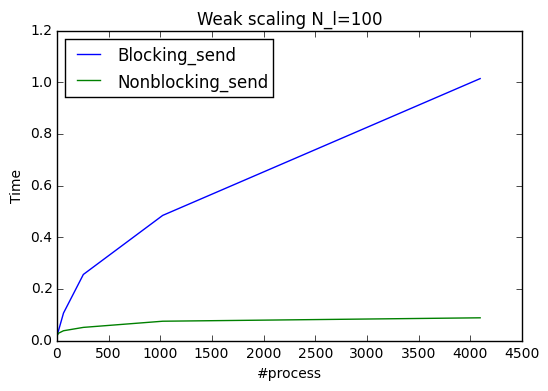

In [42]:
%matplotlib inline  

import pandas as pd

array=[1, 4, 16, 64, 256, 1024, 4096]
with open('../console_ouput/q2.8422676.out','r') as f:
    t = []
    for l in f:
        if l.startswith('Time elapsed '):
            t.append(float(l.split()[3]))

array=[1, 4, 16, 64, 256, 1024, 4096]
weak_send = t[:7]
weak_isend = t[7:14]

table = pd.DataFrame(
    {
    '#proces': array,
    'Time Send': weak_send,
    'Time iSend': weak_isend,
    })
print table

from matplotlib import pyplot as plt
plt.plot(array,weak_send,label='Blocking_send')
plt.plot(array,weak_isend,label='Nonblocking_send')
plt.xlabel('#process')
plt.ylabel('Time')
plt.title('Weak scaling N_l=100')

plt.legend(loc=2)
plt.show()

## Strong scaling
I picked $N$ to be 6400, such that it is divisible for any . So each process deals with 100\*100 matrix. I fixed the iteration to be 1000. I have calculated N=sqrt(P)\*100. Results are below.


   #proces  Time Send  Time iSend
0        1  75.540021   75.837276
1        4  26.885600   27.063200
2       16  13.133650   13.086831
3       64   3.568316    3.367364
4      256   0.694212    0.490606
5     1024   0.532481    0.110407
6     4096   0.901842    0.088330


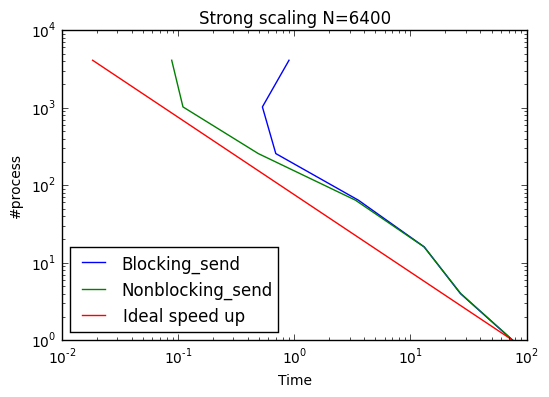

In [43]:
strong_send = t[14:21]
strong_isend = t[21:]
strong_ideal = [strong_send[0]/i for i in array]

table = pd.DataFrame(
    {
    '#proces': array,
    'Time Send': strong_send,
    'Time iSend': strong_isend,
    })
print table

 
from matplotlib import pyplot as plt
plt.plot(strong_send,array,label='Blocking_send')
plt.plot(strong_isend,array,label='Nonblocking_send')
plt.plot(strong_ideal,array,label='Ideal speed up')
plt.xlabel('Time')
plt.ylabel('#process')
plt.title('Strong scaling N=6400')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=3)
plt.show()

### Question 3

In [45]:
import pandas as pd

with open('../console_ouput/q3.8414040.out','r') as f:
    n = []
    t = []
    for l in f:
        if l.startswith('N: '):
            n.append(int(l.split()[1].split(',')[0]))
            t.append(float(f.next().split()[3]))
fn = [a/float(n[5]) for a in n]
ft = [a/float(t[5]) for a in t]
table = pd.DataFrame(
    {'Factor_N': fn,
    'N': n,
     'Time': t,
     'Factor_Time': ft
    })
print table


   Factor_N  Factor_Time         N      Time
0     0.001     0.550013       100  0.018921
1     0.010     0.193773      1000  0.006666
2     0.050     0.177931      5000  0.006121
3     0.100     0.254411     10000  0.008752
4     0.500     0.642888     50000  0.022116
5     1.000     1.000000    100000  0.034401
6     5.000     5.381995    500000  0.185146
7    10.000     9.903985   1000000  0.340707
8    50.000    51.159995   5000000  1.759955
9   100.000   105.603791  10000000  3.632876
